# Programming Lesson and Exercises - VIS

The goal of these programming lesson and exercises is to teach you how to visualize data using Python.


This notebook has the following structure:

- The first part introduces the concepts for this week. The theory is interleaved with small exercises, which have the goal of letting you practice the concepts that were just intruduced.
- At the end there are one or more larger exercises, which have the goal to test what you have learned earlier. These will be more difficult and will require more independent work than the exercises in the first part.

All exercises can be solved with the concepts that were introduced earlier. Since there are often more than one correct way to solve a programming problem, we try to accept various correct anwers. However, many of the automatic tests in Momotor (see _How to submit your work_ below) assume that your answers are constructed using the concepts introduced in these notebooks. If you look for answers on the Internet (e.g. if you import other libraries) you run the risk that your answers will be rejected.

Some of the small exercises can be solved by copy-pasting code from the examples. However, it is up to you to try to solve the exercises yourself, which will help you learn, before copy-pasting the answers. The ease of looking up answers is meant to provide guidance when you get stuck, especially for those of you who are new to programming.

For your convenience, in the `support` directory you will find a summary of the Python methods introduced in this notebook.



# Introduction to This Template Notebook

* This is a **personal** notebook.
* Make sure you work in a **copy** of `...-template.ipynb`,
**renamed** to `...-yourIDnr.ipynb`,
where `yourIDnr` is your TU/e identification number.

<div class="alert alert-danger" role="danger">
<h3>Integrity</h3>
<ul>
    <li>In this course you must act according to the rules of the TU/e code of scientific conduct.</li>
    <li>All the exercises and the graded assignments are to be executed individually and independently.</li>
    <li>You must not copy from the Internet, your friends, books... If you represent other people's work as your own, then that constitutes fraud and will be reported to the Examination Committee.</li>
    <li>Making your work available to others (complicity) also constitutes fraud.</li>
</ul>
</div>

You are expected to work with Python code in this notebook.

The locations where you should write your solutions can be recognized by
**marker lines**,
which look like this:

>`#//`
>    `BEGIN_TODO [Label]` `Description` `(n points)`
>
>`#//`
>    `END_TODO [Label]`

<div class="alert alert-warning" role="alert">Do NOT modify or delete these marker lines.  Keep them as they are.<br/>
NEVER write code <i>outside</i> the marked blocks.
Such code cannot be evaluated.
</div>

Proceed in this notebook as follows:
* **Read** the text.
* **Fill in** your solutions between `BEGIN_TODO` and `END_TODO` marker lines.
* **Run** _all_ code cells (also the ones _without_ your code),
    _in linear order_ from the first code cell.

**Personalize your notebook**:
1. Copy the following three lines of code:

  ```python
  AUTHOR_NAME = 'Your Full Name'
  AUTHOR_ID_NR = '1234567'
  AUTHOR_DATE = 'YYYY-MM-DD'
  ```
1. Paste them between the marker lines in the next code cell.
1. Fill in your _full name_, _identification number_, and the current _date_ (i.e. when you first modified this notebook, e.g. '2022-02-06') as strings between the `Author` markers.
1. Run the code cell by putting the cursor there and typing **Control-Enter**.


In [1]:
#// BEGIN_TODO [Author] Name, Id.nr., Date, as strings (1 point)

AUTHOR_NAME = 'Daniel Tyukov'
AUTHOR_ID_NR = '1819283'
AUTHOR_DATE = '2023-02-17'

#// END_TODO [Author]

AUTHOR_NAME, AUTHOR_ID_NR, AUTHOR_DATE

('Daniel Tyukov', '1819283', '2023-02-17')

## Table of Contents

- [1. Introduction to Visualization](#1.-Introduction-to-Visualization) 
  - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
  - [Loading the Libraries](#Loading-the-Libraries)
  - [Concepts and Terminology for Plotting](#Concepts-and-Terminology-for-Plotting)
  - [Best Practices for Plotting](#Best-Practices-for-Plotting)
- [2. Matplotlib and Pandas](#2.-Matplotlib-and-Pandas) 
  - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
  - [Stocks](#Stocks)
  - [A Simple Plot](#A-Simple-Plot)
  - [Title, Axis Labels, Legend](#Title,-Axis-Labels,-Legend) 
      - [Exercise 2.a](#Exercise-2.a)
  - [Saving a Plot](#Saving-a-Plot) 
      - [Exercise 2.b](#Exercise-2.b)
  - [Line Styles, Colors, Marker Styles](#Line-Styles,-Colors,-Marker-Styles) 
    - [Line Styles](#Line-Styles)
    - [Marker Styles](#Marker-Styles)
    - [Colors](#Colors)
    - [Exercise 2.c](#Exercise-2.c)
  - [Plot Range Limits and Plot Size](#Plot-Range-Limits-and-Plot-Size) 
    - [Exercise 2.d](#Exercise-2.d)
  - [Text and Annotation](#Text-and-Annotation) 
    - [Exercise 2.e](#Exercise-2.e)
  - [Combining Multiples Plots](#Combining-Multiple-Plots) 
    - [Superimposing](#Superimposing)
    - [Exercise 2.f](#Exercise-2.f)
    - [Juxtaposition (Subplots)](#Juxtaposition-(Subplots))
    - [Exercise 2.g](#Exercise-2.g)
  - [Scatter Plots](#Scatter-Plots) 
    - [Scatter Matrix](#Scatter-Matrix)
    - [Transparency and Point Size](#Transparency-and-Point-Size)
    - [Exercise 2.h](#Exercise-2.h)
    - [Exercise 2.i](#Exercise-2.i)
    - [Modulating Dot Color or Size](#Modulating-Dor-Color-or-Size)
  - [Plotting Grouped Data](#Plotting-Grouped-Data) 
    - [Exercise 2.j](#Exercise-2.j)
- [3. Seaborn and Pandas](#3.-Seaborn-and-Pandas) 
  - [Learning Objectives of This Section](#Learning-Objectives-of-This-Section)
  - [The Iris Data Set](#The-Iris-Data-Set)
  - [Histogram and Density Plot](#Histogram-and-Density-Plot) 
    - [Exercise 3.a](#Exercise-3.a)
  - [Strip Plot](#Strip-Plot) 
    - [Exercise 3.b](#Exercise-3.b)
  - [Box Plot](#Box-Plot)
  - [Violin Plot](#Violin-Plot) 
    - [Exercise 3.c](#Exercise-3.c)
  - [Heat Map](#Heat-Map)
- [4. Exercise: Comparison of Laboratories](#4.-Exercise:-Comparison-of-Laboratories) 
  - [Exercise 4.a](#Exercise-4.a)
  - [Exercise 4.b](#Exercise-4.b)
  - [Exercise 4.c](#Exercise-4.c)
  - [Exercise 4.d](#Exercise-4.d)
  - [Exercise 4.e](#Exercise-4.e)
  - [Exercise 4.f](#Exercise-4.f)
  - [Exercise 4.g](#Exercise-4.g)
  - [Exercise 4.h](#Exercise-4.h)
  - [Exercise 4.i](#Exercise-4.i)
  - [Exercise 4.j](#Exercise-4.j)

# 1. Introduction to Visualization

The programming lesson on EDA introduced some ways to create plots
directly from Pandas data frames.

In this lesson, we will introduce techniques to

* **customize the plots** to emphasize the message that we would like to convey, and
* **create more advanced types of plots**.

For further details, see

* [Visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)
    in the _Pandas Documentation_
* [Seaborn documentation](https://seaborn.pydata.org/)
* [Visualization with Matplotlib](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/04.00-Introduction-To-Matplotlib.ipynb)
    in the _Python Data Science Handbook_

## Learning Objectives of This Section

After this section, you should

* know how to **load the visualization libraries**;
* understand the basic **plotting concepts and terminology**, and;
* know about **best practices** for visualization.

## Loading the Libraries

There are many plotting libraries that work with Python.
We have selected three of these libraries for this lesson:

* **`matplotlib`**: the base library for plotting, especially with Jupyter Notebook
* **`pandas`**: built on top of `matplotlib` to let you plot `DataFrame` and `Series` objects
* **`seaborn`**: built on top of `matplotlib` to create statistical plots

Execute the following code cell to load and initialize the relevant libraries.

In [ ]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()              # set Seaborn defaults
plt.rcParams['figure.figsize'] = [10, 5]   # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

# hide FutureWarnings, which may show for Seaborn calls in most recent Anaconda
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) 

# reveal a hint only while holding the mouse down
from IPython.display import HTML
HTML('<style>.h,.c{display:none}.t{color:#296eaa}.t:active+.h{display:block;}</style>')

## Concepts and Terminology for Plotting

You should know a few things about `matplotlib`:

* `matplotlib` uses the same approach to plotting as _MatLab_
    (a programming language you may already have seen or will see in other technical courses).
* With `matplotlib` you **build up a plot in a sequence of steps**,
    where each step adds _plot elements_ to the _**current figure**_.
* In a Jupyter notebook (like this one),
    such a plot must be built up in a **single code cell**.
* When that code cell is executed,
    * the _current figure_ is **automatically cleared and initialized** at the beginning, and
    * the resulting plot is **automatically shown** at the end.
* Therefore, you **do _not_ call `plt.figure()` or `plt.show()`** in a Jupyter notebook.
    (You will often see these commands when browsing the web for solutions.
    Don't use them here.)

<span>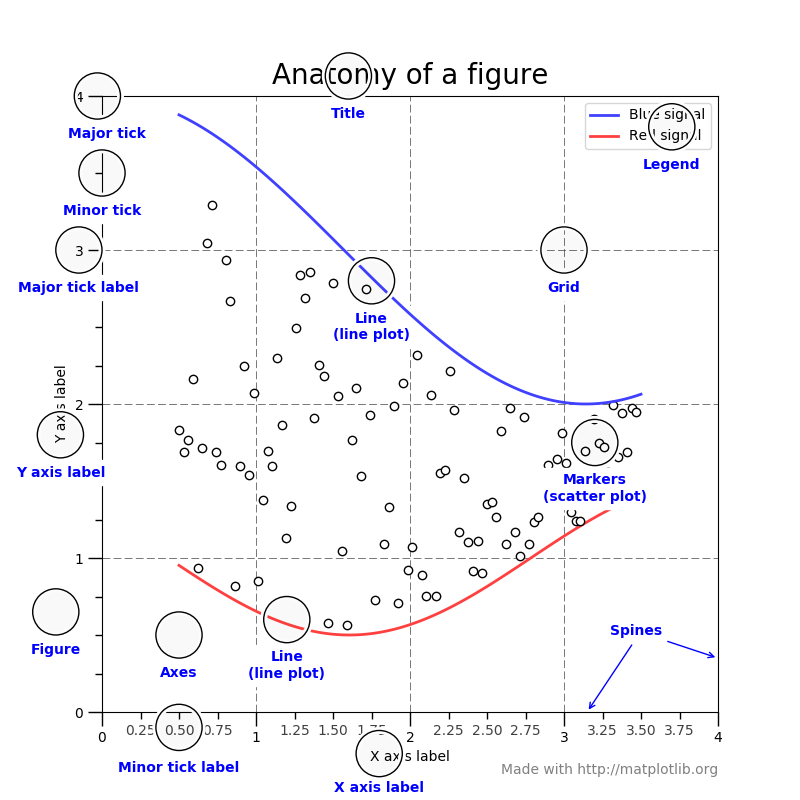</span>

The above image shows some standard terminology for plot elements.

* **Figure**: refers to the whole figure,
    possibly consisting of multiple plots ('*axes*') arranged in a grid.
* **Axes** (plural): an actual plot visualizing data in its central area,
    bounded by _spines_ that show _axis_ information;
    not to be confused with just the $x$- and $y$-axis.
* **Axis** (singular): information that defines the relationship between data values and
    horizontal or vertical offsets in the plot.
* **Spine**: a line on the boundary with reference information obtained from an _axis_.
* **Major and minor ticks**: longer and shorter lines marking off positions on a _spine_.
* **Major and minor tick labels**: numeric or textual labels of _ticks_.
* **Axis label**: a textual label of an _axis_.
* **Title**: textual label of a plot.
* **Grid**: auxiliary reference lines derived from each _axis_.
* **Lines and markers**: visualizations of data values.
* **Legend**: overview that associates text with visual elements for data.

Also, see the `matplotlib` [Usage Guide](https://matplotlib.org/stable/tutorials/introductory/usage.html).

## Best Practices for Plotting <span id="best_practices"></span>

A visualization can be a great way to communicate your results. But all too often communication is broken because the reader cannot understand the visualization. As a main rule, always ensure it is easy for your intended audience to interpret your plot, even if they do not have your knowledge about how the plot is created and what it is representing. In general, it will help if you follow the following "best practices" for visualization.

* Include a descriptive **title** for your plot.
* Make sure your plot has **labels** on the $x$- and $y$-axis. Include the **units** of the quantities on the axes if applicable.
* Choose the **right plot** for the results that you are presenting. E.g., sometimes a line plot is a good choice, but in other cases, a bar chart is much better.
* Ensure that the plot is **readable**, for instance, that the letters are not too small, and lines are not too thin. Usually, your plot is used in a different environment from where you created it. For instance, you create the plot in a notebook, but use it on a poster. It is important that you optimize your plot for the final environment.
* Ensure that your plot is also understandable for somebody who is color-blind.
* Avoid misleading the reader.
* Choose appropriate ranges for the axes of your plot. For instance, if you make a plot of a positive quantity, the range of the $y$-axis should not contain negative values.
* Include a **legend**, in particular when combining several plots.
* Include a **caption** for your plot, when you include your plot in another document.

---

# 2. Matplotlib and Pandas

## Learning Objectives of This Section

After this section, you should

* understand the basics of plotting with Pandas and Matplotlib
    for **communication with others**;
* know how to add a **title**, **axis labels**, and **legend** to a plot;
* know how to **save a plot** to a file;
* know how to adjust plot **style** and **color**;
* know how to add **text** and **annotation** to plots;
* know how to **combine multiple plots**;
* know how to make scatter plots with **alpha, color, and size settings**;
* know how to create a **scatter matrix**, and;
* know how to **modulate a scatter plot** by dot color and dot size.

## Stocks

We will illustrate the various visualization possibilities with a dataset containing the closing prices of selected stocks. The data set contains five columns: `'Date'`, `'NASDAQ'`, `'AMZN'`, `'GOOG'`, and `'MSFT'`. The `'AMZN'`, `'GOOG'`, and `'MSFT'` columns contain the closing price, in USD, for the stocks of Amazon, Google, and Microsoft respectively. The closing prices are measured on the dates in the `'Date'` column, and those dates correspond to the last (trading) days of the month. The `'NASDAQ'` column contains the closing price of the NASDAQ composite index. This is a number calculated by taking a weighted average over various stocks and is an indicator of how the market is performing.

We first read the data into a data frame `df_stocks_0`. We add the keyword argument `parse_dates=['Date']` to the `read_csv` method, so `pandas` knows that the `'Date'` column should be interpreted as dates. 

In [ ]:
df_stocks_0 = pd.read_csv('datasets/stocks-monthly.csv', parse_dates=['Date'])
df_stocks_0.head()

## A Simple Plot

First, we create a line plot for the `'NASDAQ'` column of the Stocks dataset
(see the EDA lesson).

In [ ]:
df_stocks_0['NASDAQ'].plot();

You get a single **figure** with a single plot (**axes**) consisting of a colored **line**.  
This plot automatically includes 
* The numeric **tick labels** on the $x$-axis and $y$-axis, and
* a **grid** (thanks to importing and using Seaborn).

There are many issues with this plot. One issue needs immediate attention: the drawn curve should show the development of the NASDAQ composite index over time but on the $x$-axis we only see integers. This is because the `'NASDAQ'` column is plotted against the index, instead of the dates. One way to fix this is to set the `'Date'` column as the new index for the data frame. We make this change and assign the resulting data frame to the `df_stocks` variable.

In [ ]:
df_stocks = df_stocks_0.set_index('Date')
df_stocks.head()

Let us recreate the plot of the `'NASDAQ'` column.

In [ ]:
df_stocks['NASDAQ'].plot();

The **semicolon** ('**`;`**') at the end of the line in the code cell above
suppresses the showing of the execution result
(but it does not suppress the showing of the plot).

That execution result is an **`AxesSubplot`** object.
When shown, it would look like this:
```
<matplotlib.axes._subplots.AxesSubplot at 0x...>
```
The returned object provides an `Axes` object that can be used to add further plot elements. All Pandas and Seaborn plotting functions return such an `Axes` object.

## Title, Axis Labels, Legend

We can store the result of a `plot()` call in a variable. It is customary to name this variable `ax` or `axes`, but it can be any other name. We can then use this variable to add elements to the plot, such as a **title**, **axis labels**, and a **legend**.

This variable can then be used as follows to add certain plot elements.

* **`ax.set_title(string, ...)`**: set the plot's title.
* **`ax.set_xlabel(string, ...)`**: set the $x$-axis label.
* **`ax.set_ylabel(string, ...)`**: set the $y$-axis label.
* **`ax.legend(list_of_strings)`**: add a legend, one string per column plotted.

The functions `ax.set_...` can take additional keyword arguments:

* **`size=...`** (a number, font size in points)
* **`weight=...`** (a string, font weight, e.g. `'bold'`)

Finally, the size of the _tick labels_ can be modified by writing

* **`ax.tick_params(labelsize=...)`**

This can be very useful when otherwise the letters may be too small to read. For details see [Text properties and layout](https://matplotlib.org/2.0.2/users/text_props.html).

We create again a plot of the `'NASDAQ'` column, but now with additional information,
using the variable `ax_nasdaq` (which we will refer to later).

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ']);

### Exercise 2.a

Create a plot of the price of the Google stock with respect to the date. Make sure your plot has a title and contains the labels `'Date'` for the $x$-axis and `'Price (USD)'` for the $y$-axis. Add also a legend with a single `'GOOG'` element.


In [ ]:
#// BEGIN_TODO [VIS_2a] Plot value of GOOG stock (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2a]

## Saving a Plot

You can **save a plot to a file** by writing as the last statement in the code cell:

* **`plt.savefig(file_name)`**

The call `plt.savefig()` **must appear in the same code cell** that constructed the plot.

If you captured the result of the plot call in variable `ax`,
then you can also do (possibly in a later code cell):

* **`ax.get_figure().savefig(file_name)`**

In [ ]:
ax_nasdaq.get_figure().savefig('NASDAQ-composite.png')

Check that this file was created (in the same directory as this notebook)
and that it contains the expected plot.

> **Note:** The **extension** of the file name will determine the **file format**. Many common file formats are supported, including `pdf`, `png`, `ps`, and `svg`.

### Exercise 2.b

Save your plot for the Google stock to a PDF named
`'GOOG.pdf'`.

> **Hint:** Check that the file was created, and contains the expected plot.

In [ ]:
#// BEGIN_TODO [VIS_2b] Save GOOG plot to pdf (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2b]

## Line Styles, Colors, Marker Styles

There are many options to change the appearance of a **line plot**. For instance, you can vary the **line style**, **marker style**, and **color**.

### Line Styles

The line style can be set with the **`linestyle=...`** argument. To obtain an overview of all **supported line styles**, execute the following code cell:

In [ ]:
mpl.lines.lineStyles

Here is the same plot with a **dotted** line.

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot(linestyle=':')
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ']);

The **line width** can be set with the keyword argument **`linewidth=...`** (similar to the keyword argument **`size=16`** above).

### Marker Styles

The marker style can be set with the **`marker=...`** argument. To obtain an overview of all **supported marker styles**, execute the following code cell:

In [ ]:
mpl.markers.MarkerStyle.markers

Here is the same plot with **octagons** as markers.

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot(marker='8')
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ']);

This looks pretty terrible because there are way too many markers. For this plot, it seems better to not use any markers at all.

There could be some alternative options. The **marker size** can be varied with the keyword argument **`markersize=...`**. Or, we can specify to only mark every $6$th point in the data set by adding the keyword argument **`markevery=6`**.


### Colors

The color is specified with the **`color=...`** argument. To obtain an overview of all **supported base colors** and their RGB values,
execute the following code cell.

In [ ]:
mpl.colors.BASE_COLORS

The letters are abbreviations for:

* **`'b'`** : blue
* **`'c'`** : cyan
* **`'g'`** : green
* **`'k'`** : black
* **`'m'`** : magenta
* **`'r'`** : red
* **`'w'`** : white
* **`'y'`** : yellow

Here is the same plot with a **solid red line**.

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot(color='r')
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ']);

There are also **full-color names** for more subtle variations. To obtain an overview of all **supported full-color names** and their RGB hex values,
execute the following code cell.
It is best to use the _color name_ instead of the hex value.  

> **Warning:** This is a long overview.

In [ ]:
mpl.colors.cnames

### Exercise 2.c

Create a plot of the `'AMZN'` stock with respect to the date. Use a green, dash-dotted line.

> **Hint:** Look again at the list of _supported line styles_.

In [ ]:
#// BEGIN_TODO [VIS_2c] Create plot for AMZN with green, dash-dotted line (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2c]

## Plot Range Limits and Plot Size

If we plot the NASDAQ composite index by

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date');
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ']);

then the plunge of NASDAQ around the 2008 financial crisis looks extra dramatic by the choice of plot range. 

There is a way to **limit the plot range** by using

* **`ax.set_xlim(min, max)`**
* **`ax.set_ylim(min, max)`**

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot()
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ'])

ax_nasdaq.set_xlim('2015-01-01', '2016-12-31')
ax_nasdaq.set_ylim(4000, 6000);

> **Note:** When specifying dates, use the convention `'year-month-day'` (e.g. `'2016-12-31'`). Specifying dates in the opposite order `'day-month-year'` (e.g. `'31-12-2016'`) may lead to inconsistent behavior.

The **size of a plot** can be set for a single plot
by supplying the keyword argument **`figsize=(W, H)`** to the `plot()` method,
where `W` and `H` are the width and height respectively, in _inches_. For instance, if we want to change the previous figure to a figure which is 16 inches wide and 9 inches high, we could do this with the following code. 

We set the size of the axis and tick labels below by hand. Otherwise, they would be too small in comparison, because the figure is so large.

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot(figsize=(16, 9))
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ'])

ax_nasdaq.set_xlim('2015-01-01', '2016-12-31')
ax_nasdaq.set_ylim(4000, 6000)

ax_nasdaq.tick_params(labelsize=14);

### Exercise 2.d

Create a plot of the `'GOOG'` stock in _black_ with *line width 5*,
limiting the $x$-axis between 2008-01-01 and 2010-01-01 an $y$-axis between 0 and 400, 
giving the figure a size of *9 inch wide by 6 inch high*.

In [ ]:
#// BEGIN_TODO [VIS_2d] Create GOOG plot, thick black, x- and y-limited, 9:6 (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2d]

## Text and Annotation

You can put arbitrary **text** and **arrows** in a plot, using

* **`ax.text(x, y, string)`**, where `x` and `y` are the coordinates of the bottom left corner of the text
* **`ax.annotate(string, xy=(x, y), xytext=(x, y), arrowprops=...)`**, where `xy=...` are the coordinates of the tip of the arrowhead, `xytext=...` are the coordinates of the bottom left corner of the text, and the value for `arrowprops` is a _dictionary_ of arrow properties (see example).
    
For more details, see the `matplotlib` documentation:
* [Annotating Plots](https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html)
* [Text properties and layout](https://matplotlib.org/2.0.2/users/text_props.html)

> **Important:** Make sure to put a `;` after `ax.text()` or `ax.annotate()`.

The following example shows the line plot of the NASDAQ composite index again,
but now with additional text and an arrow pointing at the sharp drop related to the financial crisis.

In [ ]:
ax_nasdaq = df_stocks['NASDAQ'].plot(figsize=(9, 6))
ax_nasdaq.set_title('Development of NASDAQ Composite Index', size=16, weight='bold')
ax_nasdaq.set_xlabel('Date')
ax_nasdaq.set_ylabel('Index')
ax_nasdaq.legend(['NASDAQ'])

ax_nasdaq.set_xlim('2007-01-01', '2018-01-01')
ax_nasdaq.set_ylim(0, 8000)

ax_nasdaq.text('2015-01-01', 6500, 'Where is this going?')  # add text; can use LaTeX; needs doubled backslashes
arrow = {'facecolor': 'black', 'width': 2, 'shrink': 0.05}  # arrow properties
ax_nasdaq.annotate('Bankruptcy of Lehman Brothers',         # add annotation
            xy=('2008-09-15', 2400), 
            xytext=('2009-02-01', 3500), 
            arrowprops=arrow);

### Exercise 2.e

Recreate the plot from [Exercise 2.d](#Exercise-2.d). Add to the plot an arrow pointing at the bankruptcy of Lehman Brothers on September 15th, 2008.

In [ ]:
#// BEGIN_TODO [VIS_2e] Annotated GOOG plot (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2e]

## Combining Multiple Plots

In this section, we will see various ways to combine multiple plots in one figure. 

### Superimposing

When plotting a data frame with multiple (numeric) columns,
using a **single `plot()` call**,
all the column plots are **superimposed** (put **on top of each other**)
**in a single figure**,
thereby sharing $x$- and $y$-axis.
**Colors** are used to distinguish the columns,
and an automatic **legend** explains the coloring scheme.

In [ ]:
df_stocks.plot();

Plots created in **separate `plot()` calls** can be superimposed via the _axes_ object.

* The **axes object** of the _first_ `plot()` call is **stored in a variable** (e.g. `ax_combined`).
* Subsequent `plot()` calls are then supplied with an extra keyword argument **`ax=ax_combined`**.  
    (If the axes object is stored in variable `ax`, then the first `ax` is the name of the keyword argument of `plot()`,
    and the second is the `ax` variable.)

Here are line plots for the first two data sets, superimposed in one _axes_ object. Note that we have provided our own legend and stored the axes object in the variable `ax_combined`.

In [ ]:
ax_combined = df_stocks['GOOG'].plot()
df_stocks['AMZN'].plot(ax=ax_combined)
ax_combined.legend(['GOOG', 'AMZN']);

As you can see, we have plotted multiple stocks in one figure. However, the plot does not adhere to the best practices. The purpose of the next exercise is to improve on this.

### Exercise 2.f

Make line plots for the `GOOG`, `MSFT`, and `AMZN` stocks, superimposed in one _axes_ object. Keep in mind the <a href="#best_practices">best practices</a> for plotting, to create a proper figure.

In [ ]:
#// BEGIN_TODO [VIS_2f] Superimposed line plots of three stocks, follow best practices (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2f]

### Juxtaposition (Subplots)

Multiple plots can also be combined by **juxtaposition** (placing them **next to each other**)
**in a single figure**,
rather than superimposing them. We have already seen in the EDA exercises that **box plots** can be combined side-by-side,
using the **`by=...`** argument. Now we will see how to juxtaposition plots that are created by **separate `plot()` calls** using the _axes_ object.

First, you set up a **grid of subplots** using plain `matplotlib` code.
The common idiom for this is:
```python
fig, ax = plt.subplots(nrows=..., ncols=..., squeeze=False, ...)
```
> **Note**:
> The argument **`squeeze=False`** ensures that `ax` will be a 2D array of axes objects, allowing you to write `ax[i, j]` to select the appropriate subplot. With **`squeeze=True`** (which is the default), if one of the dimensions equals 1 (i.e. `nrows=1` or `ncols=1`), `ax` will be a 1D array, representing a row (if `nrows=1`) or a column (if `ncols=1`).  

Let us try that for a 2x2 grid with _empty_ plots.

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False)

You can ignore the variable `fig` for now (it is needed to capture both values returned by `plt.subplots()`).

The variable `ax` now holds a **two-dimensional array of _axes_ objects**.  It can be indexed by **`ax[row][column]`** or **`ax[row, column]`** **starting from index 0**.

Next, you provide each plot call with the appropriate argument **`ax=ax[row, column]`**.

Here is all the stocks data, shown in four separate plots.

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False, figsize=(10, 10))
df_stocks['NASDAQ'].plot(ax=ax[0, 0])
df_stocks['AMZN'].plot(ax=ax[0, 1])
df_stocks['GOOG'].plot(ax=ax[1, 0])
df_stocks['MSFT'].plot(ax=ax[1, 1]);

You can supply extra arguments to `plt.subplots()`:

* **`sharex=True`** shares a common range of the $x$-axis between the plots
* **`sharey=True`** shares a common range of the $y$-axis between the plots

You can set a **global title** with `fig.suptitle()`.

Here are the preceding plots, but now with shared $x$-axis,
and with both subplot titles, a global title, and y-labels on the leftmost plots:

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, squeeze=False, sharex=True, figsize=(10, 10))

df_stocks['NASDAQ'].plot(ax=ax[0, 0])
df_stocks['AMZN'].plot(ax=ax[0, 1])
df_stocks['GOOG'].plot(ax=ax[1, 0])
df_stocks['MSFT'].plot(ax=ax[1, 1])

ax[0, 0].set_title('NASDAQ')
ax[0, 1].set_title('AMZN')
ax[1, 0].set_title('GOOG')
ax[1, 1].set_title('MSFT')
ax[0, 0].set_ylabel('Price (USD)')
ax[1, 0].set_ylabel('Price (USD)')

fig.suptitle('Development of Stocks Over Time', size=16, weight='bold');

### Exercise 2.g

Create the three plots of the stocks of Amazon, Google, and Microsoft next to each other in one row, setting the size of the entire figure at $15\times5$ inches. Make sure you include appropriate titles for the subplots and the figure as a whole and let the plots share the $y$-axis. Don't forget to put an appropriate label on the $y$-axis.

> **Hint:** Set the $y$-axis label for the left most axes object.

In [ ]:
#// BEGIN_TODO [VIS_2g] Three plots of stocks on a row (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2g]

## Scatter Plots

Recall from the EDA exercises that you can create a scatter plot by providing the argument `kind='scatter'` to the function `plot()`. 

We will now present a useful procedure to create many scatter plots at once, to get an idea of the relationships between various columns in a data set.

### Scatter Matrix

When investigating data sets with multiple columns and/or many values, it is important to take a bit more care when creating plots. We illustrate this with some examples based on a randomly generated data set.

The data has _five_ columns, named `'a'`, `'b'`, `'c'`, `'e'`, and `'f'`,
where `'a'`, `'b'`, and `'e'` are *numeric*, and `'c'` and `'f'` are *Boolean*:

In [ ]:
df_sd = pd.DataFrame(((x, v, b, e, not b)
                      for b in (False, True)
                      for x in np.random.sample(5000 if b else 20000)
                      for e in np.random.sample(1)
                      for v in [x ** 3 + (e - 0.5) / 10 if b else x + (e - 0.8) * 0.7]
                      if 0 <= v < 1),
                     columns=list('abcef'))
df_sd.info()

In [ ]:
df_sd.head()

To get an impression of possible relationships between the values in these columns,
we create a **scatter matrix**,
consisting of a **scatter plot** for _each pair_ of the numeric columns
(`a`, `b`, `e`).
On the diagonal of this matrix, we show a **density plot** of the corresponding column.

This is accomplished by calling **`pd.plotting.scatter_matrix()`**,
supplying as arguments the appropriate columns of the data frame,
and the keyword argument **`diagonal='...'`**.

In [ ]:
# scatter matrix for pairs of colums 'a', 'b', and 'e'
pd.plotting.scatter_matrix(df_sd[['a', 'b', 'e']], diagonal='density', figsize=(10, 10));

> **Note:** Each scatter plot appears twice. 

The columns `'a'` and `'b'` appear to be *positively correlated*:
higher values of `'a'` correspond to higher values of `'b'`.

There are also peculiar patterns in the other two correlations.

However, because there are so many values in the plots,
details may have been obscured.
For example, there is a _lack of contrast_.

### Transparency and Point Size

There are two parameters that we can play with to improve the contrast:

* the **transparency** of the dots (also knowns as the **alpha setting**), and
* the **size** of the dots.

The **alpha setting** is a value between

* 0 (fully *transparent*) and
* 1 (fully *opaque*).

When dots are plotted on top of each other in an area,
their opaqueness accumulates: more dots means more ink.

We illustrate this with the scatter plot for `a` and `b`,
using two different alpha settings by supplying **`alpha=`** as an extra argument:

In [ ]:
# effect of alpha (transparency: 0 = transparent; 1 = opaque)
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(11, 5))
df_sd.plot(kind='scatter', x='a', y='b', c='blue', alpha=1, ax=ax[0])  # too high
df_sd.plot(kind='scatter', x='a', y='b', c='blue', alpha=0.005, ax=ax[1]);  # a bit low

### Exercise 2.h

Create a square scatter plot (say, 5x5 inches) for columns `a` and `b`,
using `alpha=0.05`, which should give a better result.

> **Hint:** Do not use `plt.subplots()` if it is not necessary.

In [ ]:
#// BEGIN_TODO [VIS_2h] Scatter plot for a and b with alpha 0.05 (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2h]

A similar effect is obtained by **reducing the dot size**,
which can be accomplished by keyword argument **`s=...`**:

In [ ]:
# effect of size (s=)
fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(11, 5))
df_sd.plot(kind='scatter', x='a', y='b', c='blue', s=10, ax=ax[0])  # too high
df_sd.plot(kind='scatter', x='a', y='b', c='blue', s=.01, ax=ax[1]);  # a bit low

### Exercise 2.i

Do the same scatter plot as one of the two plots above, but with dot size 0.2,
which should give a better result:

In [ ]:
#// BEGIN_TODO [VIS_2i] Scatter plot for a and b with dot size 0.2 (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2i]

This reveals another relationship between columns `'a'` and `'b'`;
one that is _not linear_.

### Modulating Dot Color or Size

Another thing we can do in scatter plots is to **modulate** a dot parameter,
such as **color** or **size**, _based on another column_.

Here is a scatter plot for columns `'a'` and `'b'`,
where _color_ is modulated by column `'e'`,
by supplying argument **`c='e'`**:

In [ ]:
# modulate color (c=) by value in column 'e'
df_sd.plot(kind='scatter', x='a', y='b', c='e', figsize=(6,5));

Sometimes it may be useful to change the color palette for modulating the color, which can be done with the **`colormap=...`** argument (you can find possible colormap values [here](https://matplotlib.org/stable/tutorials/colors/colormaps.html)).

In [ ]:
# modulate color (c=) by value in column 'e' usin the 'coolwarm' colormap
df_sd.plot(kind='scatter', x='a', y='b', c='e', colormap='viridis', figsize=(6, 5));

We clearly see that our data set actually consists of two different kinds of data,
each with its own correlations.
Here, we can conveniently separate them on the basis of column `'c'`.

## Plotting Grouped Data

The result of a `groupby()` call is a **grouping object** that holds the _data groups_.
This grouping object can also be plotted.

Here is a scatter plot for `'a'` against `'b'` grouped by column `'c'`. 
Since the group labels are not shown with the plots by default, we manually add plot titles via the axes object.

In [ ]:
ax = df_sd.groupby('c').plot(kind='scatter', x='a', y='b', c='blue', figsize=(6, 5))
ax[0].set_title('c is False', size=16)
ax[1].set_title('c is True' , size=16);

We can also superimpose the different groups in a single plot using different colors. Continuing with the example of plotting  `'a'` against `'b'` grouped by column `'c'`, first we define the mapping from the values in the `'c'` column to a color name.

In [ ]:
colors = {True: 'k', False: 'r'}

Then we create an axis, where we will superimpose the plots for all the groups, and iterate over all groups using a for loop, plotting each group with its corresponding color in `colors`.

In [ ]:
fig, ax = plt.subplots(figsize=(6, 5))
for name, group in df_sd.groupby('c'):
    group.plot(kind='scatter', x='a', y='b', c=colors[name], ax=ax)

### Exercise <span class="exercise">2.j</span>

Create two scatter plots for `'a'` against `'b'` grouped by column `'f'` and color modulated by column `'e'` using the `'magma'`, setting the figure size at 6x5 inches:

In [ ]:
#// BEGIN_TODO [VIS_2j] Scatter plots for a and b grouped by f, color modulated by e (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_2j]

___

# 3. Seaborn and Pandas

_Seaborn_ is a visualization library for statistical plots. While you may achieve similar visualizations using the matplotlib or Panda's `plot()` method, you may find Seaborn a convenient alternative.

## Learning Objectives of This Section

After this section, you should

* understand the basics of plotting with Pandas and Seaborn
    for **communication with others**;
* know how to combine a **histogram** with a **density plot**, and;
* know how to create a **box plot**, **strip plot**, **violin plot**, and **heat map**.

## The Iris Data Set

We will illustrate the Seaborn library with the popular Iris dataset, which was published in 1936 by Edgar Anderson in a study of the morphologic variation of Iris flowers of three related species (*Iris setosa*, *Iris versicolor*, and *Iris virginica*).

The following code cell reads this data set as `DataFrame` into the variable `iris`
and views its head.

In [ ]:
iris = pd.read_csv('datasets/iris.csv')
iris.head()

Obtain some information about the `DataFrame`.

In [ ]:
iris.info()

We can compute the count, mean and standard deviation statistics per species using the `.agg()` function (which stands for *aggregate*):

In [ ]:
iris.groupby('species').agg(['count', 'mean', 'std'])

We split the data set according to the species into three parts (using appropriate *Boolean masks*, as introduced in the EDA lesson), and assign them to three separate variables.

In [ ]:
iris_setosa = iris[iris['species'] == 'Iris-setosa']
iris_versicolor = iris[iris['species'] == 'Iris-versicolor']
iris_virginica = iris[iris['species'] == 'Iris-virginica']

# make indices run from 0 through 49
iris_versicolor = iris_versicolor.reset_index(drop=True)
iris_virginica = iris_virginica.reset_index(drop=True)

iris_virginica  # check by inspection

## Histogram and Density Plot

In Seaborn, a combined **histogram** with a **density plot** can be drawn using **`sns.distplot()`**. See [Seaborn Distplot Plot](https://seaborn.pydata.org/generated/seaborn.distplot.html) for more information.

Here is a histogram with 20 bins combined with a density plot for all the `'petal length'` values in the Iris data set.

In [ ]:
ax = sns.distplot(iris[['petal length']], bins=20)
ax.set_title('Histogram of the Iris petal length');

You can turn off the histogram or the density plot by adding the `hist=False` or `kde=False` argument, respectively.

Here are separate histogram and density plots for all the `'petal length'` values in the Iris data set.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
sns.distplot(iris[['petal length']], bins=20, kde=False, ax=ax[0])
sns.distplot(iris[['petal length']], bins=20, hist=False, ax=ax[1]);

### Exercise 3.a

Create a combined histogram and density plot for the petal length of the three Iris species. Place them in a $3\times 1$ grid (i.e. 3 rows and one column) of $5\times7$ inch, _share_ the $x$ and $y$ axis, title each plot appropriately, and label the $x$-axis of the bottom plot with "petal length".

> **Hint:** Note how `iris[['petal length']]` in the examples above is a `DataFrame` object. Supplying a `Series` object `iris['petal length']` would automatically add the label `'petal length'` to the $x$ axis.

In [ ]:
#// BEGIN_TODO [VIS_3a] Combined plots in 3x1 grid (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_3a]


Can you now explain the bimodal distribution of the petal length of the entire Iris data set shown above?

## Strip Plot

A **strip plot** plots data values as dots on a linear strip. In Seaborn, a strip plot can be drawn using **`sns.stripplot()`**. When there are many points, it is useful to play with the numeric argument **`jitter=...`** to set how much the points are spread randomly in the horizontal direction. See [Seaborn Strip Plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html) for details.

A strip plot for the `'petal length'` in each Iris species.

In [ ]:
sns.stripplot(data=iris, x='species', y='petal length');

We can also remove the jitter by setting **`jitter=0`**:

In [ ]:
sns.stripplot(data=iris, x='species', y='petal length', jitter=0);

> **Notes:**
>
> * The **`x=...`** argument indicates by what column(s) to _group_ the data.  
>     Omit it if no grouping is desired.
> * The **`y=...`** argument indicates which column(s) to plot.  
>     Omit it to plot all columns of a data frame.
> * The default orientation is _vertical_ when there are _multiple_ strips, and
>     _horizontal_ when there is a _single_ strip.  
>     Orientation can be forced with **`orient='v'`** or **`orient='h'`**.
> * **`jitter=...`** can be used to set a numeric value manually.

### Exercise 3.b

Create a strip plot for column `'sepal width'` in each Iris species:

In [ ]:
#// BEGIN_TODO [VIS_3b] Stripplot for the sepal width in each species (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_3b]

## Box Plot

In Seaborn, a **box plot** can be drawn using **`sns.boxplot()`**. See [Seaborn Box Plot](https://seaborn.pydata.org/generated/seaborn.boxplot.html) for details.

A box plot for column `'petal length'` in each Iris species:

In [ ]:
sns.boxplot(data=iris, x='species', y='petal length');

## Violin Plot

A **violin plot** is a refinement of a box plot. In Seaborn, it can be drawn using **`sns.violinplot()`** and consists of a density plot that is reflected on the base axis, the area in-between being colored in, and with a small box plot inside. See [Seaborn Violin Plot](https://seaborn.pydata.org/generated/seaborn.violinplot.html) for details.

A violin plot for column `'petal length'` in each Iris species.

In [ ]:
sns.violinplot(data=iris, x='species', y='petal length');

### Exercise 3.c

Create a violin plot for `'sepal width'` in each Iris species.

In [ ]:
#// BEGIN_TODO [VIS_3c] Violin plot for the sepal width in each species (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_3c]

## Heat Map

A **heat map** plots a (2D) matrix of values as a 2D grid of colored squares.
In Seaborn, this is done using `sns.heatmap()`. See [Seaborn Heat Map](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for details.

For example, let us generate a data frame representing a 3x4 matrix with values sampled from a uniform distribution in the range [0, 1).

In [ ]:
df_random_matrix = pd.DataFrame(np.random.rand(3, 4))
df_random_matrix

We can visualize this matrix with a heat map.

In [ ]:
sns.heatmap(data=df_random_matrix);

We will now use a heat map to explore the distribution of the petal width and petal length of the Iris flowers. We will need to transform the data first.

We first divide the _petal width_ and _petal length_ features each into five equal levels `'tiny', 'small', 'medium', 'big', 'large'` and count the number of Iris flowers that fall into that level:

> **Note:** the Pandas `cut()` method bins the values of a list or Series into discrete intervals. See [Pandas cut](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html) for details, or use Shift Tab-Tab to view the details.

In [ ]:
levels = ['tiny', 'small', 'medium', 'big', 'large']
iris['petal width level'] = pd.cut(iris['petal width'], len(levels), labels=levels)
iris['petal length level'] = pd.cut(iris['petal length'], len(levels), labels=levels)
iris.head()

We transform the data frame into a matrix shape, where

* matrix _rows_ represent the *petal width level*,
* matrix _columns_ represent the *petal length level*, and
* matrix _entries_ represent the _number of flowers_ that fall into the particular _petal width level_ and *petal length level*.

We first group the data by `'petal width level'` and `'petal length level'`, counting the number of instances for each width and length level combination.

In [ ]:
iris_grouped = iris.groupby(['petal width level', 'petal length level']).count()

# fill the NaN values with 0's
iris_grouped['count'] = iris_grouped['species'].fillna(0)
iris_grouped.head(10)

We are interested only in the `'count'` column.

In [ ]:
iris_grouped['count'].head()

We can reshape the Series with a multi-index into a data frame with a row per width level and a column per length level by applying the **`unstack()`** method.

In [ ]:
iris_matrix = iris_grouped["count"].unstack()
iris_matrix

Next, we create the heat map.

In [ ]:
sns.heatmap(data=iris_matrix, square=True);

# 4. Exercise: Comparison of Laboratories

Now let us put your data visualization skills to the test by analyzing the data that measures the fat content in eggs.


In the earlier exercises you were closely guided. In the following exercises we will put your knowledge to the test.

Note that these exercises may seem more difficult as you will need to work more indepedently. When you struggle with an exercise then go back to the corresponding earlier section and make sure you really understand the introduced concepts. Do not hesitate to experiment with your own code!


Canned dried egg powder is sold as a supplement for fresh eggs.
Each can contains two different types of eggs.
As part of a quality control program,
the fat content of eggs is being investigated.
The investigation is divided into 6 different laboratories.
Every laboratory receives the same number of eggs of both types.
Testing the fat content of eggs is destructive, so each egg can only be investigated once.
Since measuring the fat content is time-consuming,
the measurements are divided among 2 laboratory assistants within each laboratory.
The fat content is measured as a percentage.

A quality manager applies a certain statistical procedure and
claims that there is a significant difference between the fat contents measured by the laboratories.
This report causes confusion
since the 6 laboratories all have a good reputation and
there is no reason to expect a large variation in the fat content of the eggs.

Your task is to find an explanation by making appropriate plots of the data set `eggs.csv`.
The following questions will guide you in finding an explanation.

### Exercise 4.a

Write Python code to load the data set from the data file `eggs.csv` into a Pandas `DataFrame` named `df_eggs`, and show its overview (including the column names and their types).

> **Hint:** The `eggs.csv` file resides in the `datasets` folder.

In [ ]:
#// BEGIN_TODO [VIS_4a] Load data set and show information (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4a]

If things went well,
you will see for each of the four columns

* its label,
* the number of (non-null) values, and
* its type.

The `'Sample'` column refers to the egg type, which is either `'G'` or `'H'`.

### Exercise 4.b

Create two plots, below each other, one containing a combined histogram and density plot for the fat content of sample `'G'`, and the other for the fat content of sample `'H'`. To not be mislead by the figure, make sure that the limits on the $y$-axis are the same for both plots and that the $x$-axis is shared. The label on the $x$-axis should read `'Fat content (%)'`.

> **Hint:** Similar to the Matplotlib and Pandas `.plot()` function, Seaborn plotting functions also accept the `ax=...` argument.

In [ ]:
#// BEGIN_TODO [VIS_4b] Combined histogram and density plot for fat content (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4b]

### Exercise 4.c

Create violin plots for the fat content for each of the 6 laboratories
in a single figure.
Add the title `"Violin Plots of Fat Content per Lab"` (18 point, bold). Add an appropriate label on the $y$-axis.

> **Hint:** Use `sns.violinplot()` and the _axes_ object.

In [ ]:
#// BEGIN_TODO [VIS_4c] Violin plot per laboratory (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4c]

### Exercise 4.d

Create strip plots for the fat content for the two different egg types (samples). Limit the $y$-axis between 0 and 100%. Keep in mind the best practices for plotting.

In [ ]:
#// BEGIN_TODO [VIS_4d] Jittered strip plot per sample (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4d]

### Exercise 4.e

In this exercise we will investigate different representations of the same data. Create a box plot, a violin plot, a strip plot without jitter and a strip plot with jitter for the fat content (without differentiating by lab or sample),
placing them side by side (in juxtaposition) in a figure of $12\times 5$ inch.

Include as global title `"Distribution of Fat Content in Eggs"`,
and title each subplot by its plot type.
Share the $y$-axis for all plots and label it `"Fat content (%)"`.
Create one strip plot without jitter and one with appropriate jitter (experiment with parameter values!).

> **Hints:**
> * First, set up the four side-by-side subplots (`squeeze=False` recommended).
> * Use the returned axes object to create the box, violin, and strip plots.
> * Use `fig.suptitle()` to set the global title.
> * Optionally, supply the argument `orient='v'` to the plotting functions for vertical orientation.
> * Optionally, suppress the automatic label on the $x$-axis of the box plot by doing
    ```python
    ax[0, 0].xaxis.set_visible(False)
    ```
> * Optionally, suppress the automatic label on the $y$-axis of the three right most box plots by doing
    ```python
    ax[0, 1].yaxis.set_visible(False)
    ax[0, 2].yaxis.set_visible(False)
    ax[0, 3].yaxis.set_visible(False)
    ```


In [ ]:
#// BEGIN_TODO [VIS_4e] Combined box plot, violin plot, strip plot with and strip plot without jitter (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4e]

### Exercise 4.f

Group the egg data by technician and lab (in this order),
select the column for the fat content,
and assign the result to the variable `grouped_fat_eggs`.

Next, use `grouped_fat_eggs` to create a Series with the _median_ fat content per technician and lab,
and assign it to the variable `median_fat_eggs`. It should have a 2-level multi-index with levels Technician and Lab. 

> **Hint:** You can group by several columns by providing a list as argument to `.groupby()`, e.g. `df.groupby(['A', 'B'])` will group data frame `df` by columns `'A'` and `'B'` (in that order).

In [ ]:
#// BEGIN_TODO [VIS_4f] Median fat content per technician and lab (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4f]

median_fat_eggs.to_frame()  # show Series as DataFrame (looks nicer)

The result has a **2-level multi-index (also called _hierarchical_ index)** and
one column with the fat content medians.  
This can be turned into a data frame with a row per technician
and a column per lab by applying **`unstack()`**.

In [ ]:
df_median_fat_eggs = median_fat_eggs.unstack()
df_median_fat_eggs

### Exercise 4.g

Determine the **standard deviation**
of the fat content per technician and lab
as data frame _with a row per technician and a column per lab_ ,
and assign it to the variable `df_std_fat_eggs`.

> **Hint:** Adapt the code that was used to create `df_median_fat_eggs`.

In [ ]:
#// BEGIN_TODO [VIS_4g] Standard deviation of fat content per technician and lab (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4g]

df_std_fat_eggs

### Exercise 4.h

Create one figure containing two heat maps below each other:

- one for median fat content per technician and lab, and
- one for the standard deviation of the fat content per technician and lab.

Include as titles for the subplots `"Median fat content"` and `"Standard deviation of the fat content"`, respectively. Make sure the whole figure is 10 inches wide and 10 inches tall.

In [ ]:
#// BEGIN_TODO [VIS_4h] Heat maps for median and std fat content, per technician and lab (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4h]

Do these heat maps convey the same information as the previous visualizations?  
How do they "feel" as a means of communication?

### Exercise 4.i

Was the quality manager right? Is there an indication that a significant difference exists between the fat contents measured by the laboratories?

Assign to the variable `suspicious_labs` a list of laboratories (using Roman numerals, e.g. `['IV']`) that you consider suspicious. If you find no suspicious labs, then assign an empty list `[]`.

In [ ]:
#// BEGIN_TODO [VIS_4i] Interpret the visualizations (2 points)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4i]

### Exercise 4.j

Save the preceding plot to a PDF file named `heatmap_egg_fat_content.pdf`.  

> **Hint:** Use `fig` from the preceding exercise: `fig.savefig()`.

In [ ]:
#// BEGIN_TODO [VIS_4j] Save plot to file (1 point)

# ===== =====> Replace this line by your code. <===== ===== #

#// END_TODO [VIS_4j]

# Feedback

Please fill in this questionaire to help us improve this course for the next year. Your feedback will be anonymized and will not affect your grade in any way!

### How many hours did you spend on these Exercises?

Assign a number to `feedback_time`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_1] (0 point)

#// END_FEEDBACK [Feedback_1] (0 point)

import numbers
assert isinstance(feedback_time, numbers.Number), "Please assign a number to feedback_time"
feedback_time

### How difficult did you find these Exercises?

Assign an integer to `feedback_difficulty`, on a scale 0 - 10, with 0 being very easy, 5 being just right, and 10 being very difficult.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_2] (0 point)

#// END_FEEDBACK [Feedback_2] (0 point)

import numbers
assert isinstance(feedback_difficulty, numbers.Number), "Please assign a number to feedback_difficulty"
feedback_difficulty

### (Optional) What did you like?

Assign a string to `feedback_like`.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_3] (0 point)

#// END_FEEDBACK [Feedback_3] (0 point)

### (Optional) What can be improved?

Assign a string to `feedback_improve`. Please be specific, so that we can act on your feedback. For example, mention the specific exercises and what was unclear.

In [ ]:
#// BEGIN_FEEDBACK [Feedback_4] (0 point)

#// END_FEEDBACK [Feedback_4] (0 point)




## How to Submit Your Work

1. **Before submitting**, you must run your notebook by doing **Kernel > Restart & Run All**.  
   Make sure that your notebook runs without errors **in linear order**.
1. Remember to rename the notebook, replacing `...-template.ipynb` with `...-yourIDnr.ipynb`, where `yourIDnr` is your TU/e identification number.
1. Submit the executed notebook with your work
   for the appropriate assignment in **Canvas**.
1. In the **Momotor** tab in Canvas,
  you can select that assignment again to find some feedback on your submitted work.
  If there are any problems reported by _Momotor_,
  then you need to fix those,
  and **resubmit the fixed notebook**.

In case of a high workload on our server
(because many students submit close to the deadline),
it may take longer to receive the feedback.




---

In [ ]:
# List all defined names
%whos

---

# (End of Notebook) <span class="tocSkip"></span>

&copy; 2017-2023 - **TU/e** - Eindhoven University of Technology